In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import uniform
from numpy.random import normal

In [2]:
N=10**6

La determinación del pH de una disolución utilizando una celda secundaria sigue el modelo de medición:

$$pH(S_1)=pH(MRC)-\frac{E_\Delta-E_j-E_{id}}{\ln{10}\left(\frac{R\left(T+273.15\right)}{F}\right)}+\delta_{rep}$$

Donde:

- $pH(MRC)$ es el $pH$ del material de referencia certificado.
- $E_j$ es el potencial de la unión líquida.
- $E_{id}$ es el potencial en el material de referencia certificado.
- $E_\Delta$ es el potencial entre el material de referencia certificado y el material de referencia que se está produciendo.
- $R$ es la constante de los gases ideales.
- $F$ es la constante de Faraday.
- $T$ es la temperatura del baño medida con la RTD.
- $\delta_{rep}=0$ es el término de la repetibilidad del $pH$ del baño.

El diagrama de Ishikawa muestra las fuentes de incertidumbre para cada magnitud:

<img src="Figuras/Imagen1.png" alt="drawing" width="1000"/>

Para $E_\Delta$ se tiene que:

$$U_{cal}=0.000\,000\,82\textrm{ V},\quad k=2$$

$$E_{cab}=\pm0.5\times10^{-6}\textrm{ V}$$

$$EMP_{inst}=\pm\frac{(19\cdot\left|rdg\right|+9\cdot0.2)\cdot\left|rdg\right|}{10^6}$$

$$d=10^{-8}\textrm{ V}$$

$$C=-0.000\,000\,19\textrm{ V}$$

Para $E_{id}$ se tiene que:

$$U_{cal}=0.000\,000\,82\textrm{ V},\quad k=2$$

$$E_{cab}=\pm0.5\times10^{-6}\textrm{ V}$$

$$EMP_{inst}=\pm\frac{(19\cdot\left|rdg\right|+9\cdot0.2)\cdot\left|rdg\right|}{10^6}$$

$$d=10^{-8}\textrm{ V}$$

$$C=-0.000\,000\,19\textrm{ V}$$

$$u_{rep}=\frac{s_{E_{id}}}{\sqrt{n}}$$

Para $E_j$ se tiene que:

$$E_j=0.1\cdot E_\Delta$$

$$u(E_j)=\frac{E_j}{\sqrt{12}}$$

Para $T$:

$$U_{cal}=0.024\textrm{ °C},\quad k=2$$

$$d=0.001\textrm{ °C}$$

$$C=+0.054\textrm{ °C}$$

Para $pH(MRC)$:

$$pH(MRC)=4.005$$

$$U_{MRC}=0.010,\quad k=1.96$$

Para $\delta_{rep}$

$$\delta_{rep}=0$$
$$u_{rep}=\frac{s_{pH(E_\Delta})}{\sqrt{n}}$$

Cuando $E_{id}<10\textrm{ $\mu$V}$, se toma $E_{id}$ como parte de la incertidumbre, siguiendo una distribución rectangular.

# Importación de datos

In [3]:
hojadelta=pd.read_excel(r"E:\Universidades\pH\Hojas de Cálculo\GS-EQ-FM-01 Medición de pH con celda secundaria_revGMC_revEOA.xlsm",sheet_name="Data E(Δ)",skiprows=12,header=0)

In [4]:
hojaid=pd.read_excel(r"E:\Universidades\pH\Hojas de Cálculo\GS-EQ-FM-01 Medición de pH con celda secundaria_revGMC_revEOA.xlsm",sheet_name="Data E(id)",skiprows=12,header=0)

Se extraen los datos de interés:

In [5]:
e_delta=hojadelta["Potencial (V)"].values
e_id=hojaid["Potencial (V)"].values
rep=hojadelta["pHRTD (1)"].values
t=hojadelta["RTD  (°C)"].values

# Modelo de medición

In [6]:
def pH(MRC,Ed,Ej,Eid,T,d):
    R=8.31446261815324
    F=96485.33212331
    return MRC-(Ed-Ej-Eid)/(np.log(10)*(R*(T+273.15)/F))+d

# Muestreos aleatorios

In [7]:
ed=e_delta.mean()+normal(-0.00000019,0.00000082/2,size=N)+uniform(-0.0000005,0.0000005,size=N)+uniform(-(19*np.abs(e_delta.mean())+9*0.2)*np.abs(e_delta.mean())/10**6,(19*np.abs(e_delta.mean())+9*0.2)*np.abs(e_delta.mean())/10**6,size=N)+uniform(-0.00000001/2,0.00000001/2,size=N)

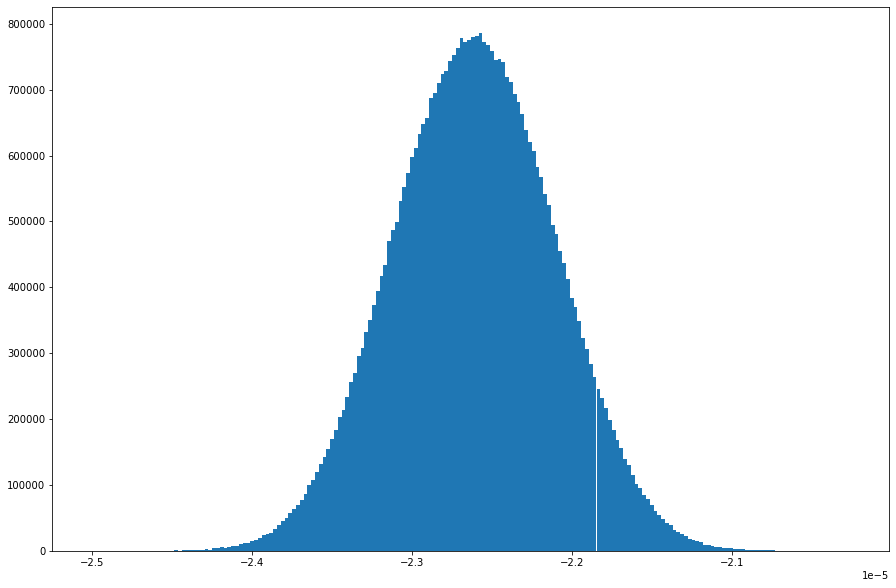

In [8]:
plt.figure(figsize=(15,10))
plt.hist(ed,bins=200,density=True)
plt.show()

In [9]:
ed.mean(),ed.std()

(-2.261023507046659e-05, 5.01164973248766e-07)

In [10]:
eid=normal(e_id.mean(),e_id.std()/np.sqrt(len(e_id)),size=N)+normal(-0.00000019,0.00000082/2,size=N)+uniform(-0.0000005,0.0000005,size=N)+uniform(-(19*np.abs(e_id.mean())+9*0.2)*np.abs(e_id.mean())/10**6,(19*np.abs(e_id.mean())+9*0.2)*np.abs(e_id.mean())/10**6,size=N)+uniform(-0.00000001/2,0.00000001/2,size=N)

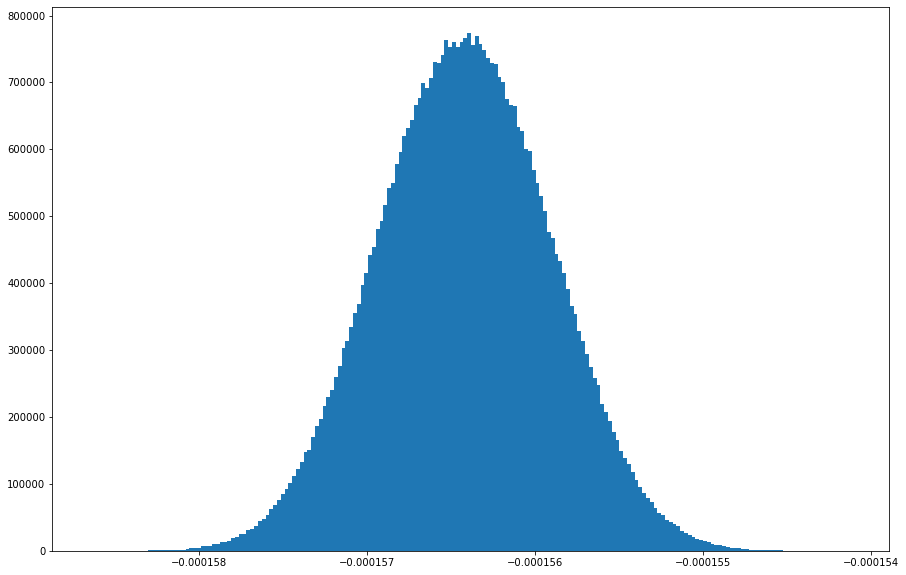

In [11]:
plt.figure(figsize=(15,10))
plt.hist(eid,bins=200,density=True)
plt.show()

In [12]:
eid.mean(),eid.std()

(-0.0001564185642890662, 5.097010569839095e-07)

In [13]:
ej=0.1*e_delta.mean()+uniform(-0.1*e_delta.mean()/2,0.1*e_delta.mean()/2,size=N)

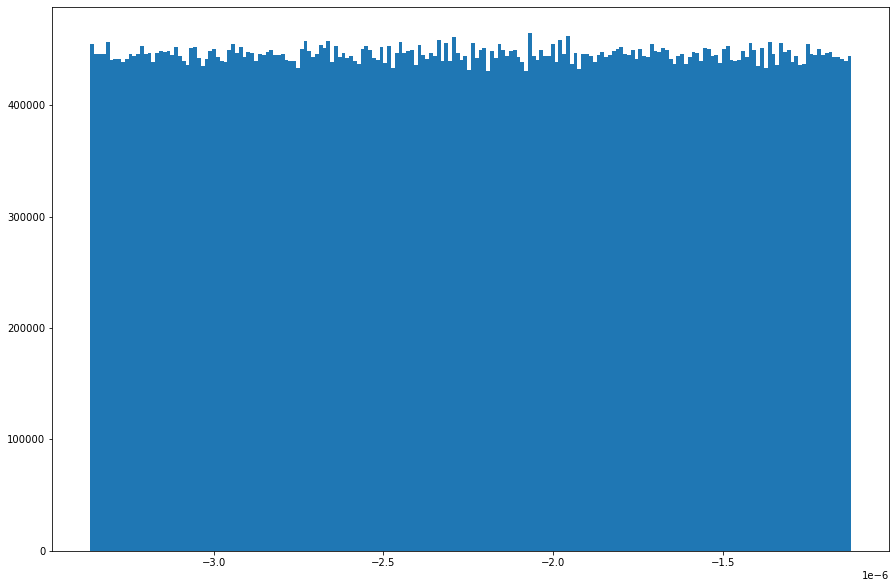

In [14]:
plt.figure(figsize=(15,10))
plt.hist(ej,bins=200,density=True)
plt.show()

In [15]:
ej.mean(),ej.std()

(-2.2422761596424166e-06, 6.469482490517105e-07)

In [16]:
T=uniform(-0.001/2,0.001/2,size=N)+normal(t.mean()+0.054,0.024/2,size=N)

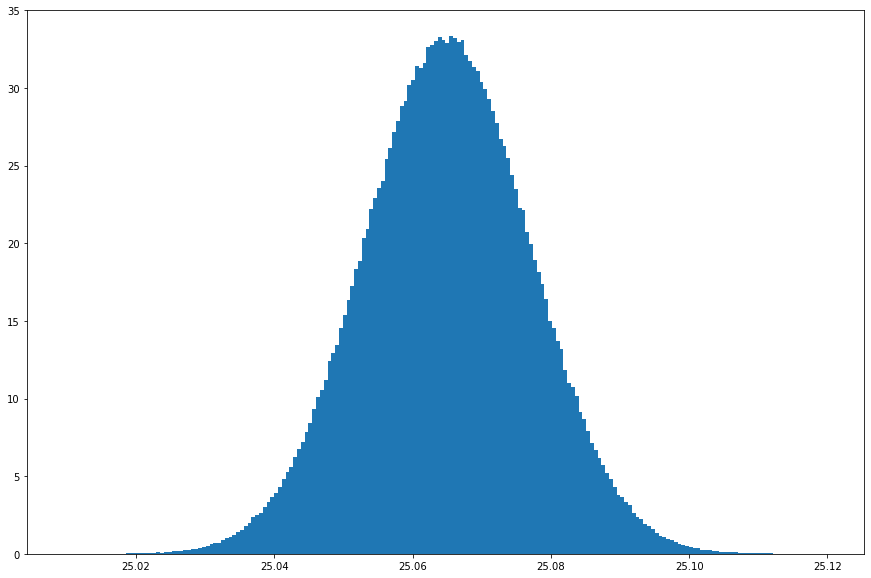

In [17]:
plt.figure(figsize=(15,10))
plt.hist(T,bins=200,density=True)
plt.show()

In [18]:
T.mean(),T.std()

(25.065008216030563, 0.012014690174363022)

In [19]:
MRC=normal(4.005,0.010/1.96,size=N)

In [20]:
drep=normal(0,rep.std()/np.sqrt(len(rep)),size=N)

# Evaluación del modelo de medición

In [21]:
ph=pH(MRC,ed,ej,eid,T,drep)

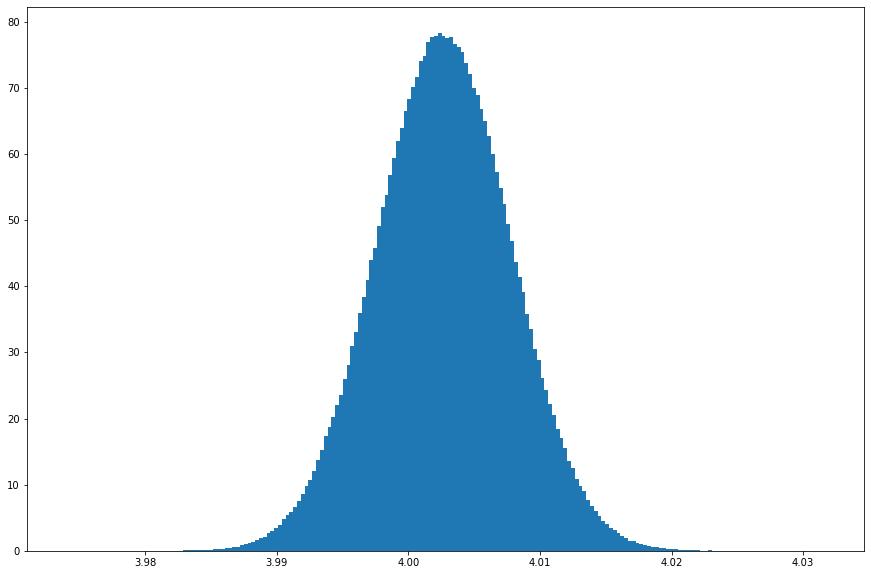

In [22]:
plt.figure(figsize=(15,10))
plt.hist(ph,bins=200,density=True)
plt.show()

El valor y la incertidumbre expandida:

In [23]:
ph.mean(),2*ph.std()

(4.002694869833965, 0.01019698574915096)

Por la Convención de Bates-Guggenheim, basada en la teoría de Debye-Hückel, se agrega una componente de variación de $\pm0.01$ del pH para cubrir variaciones del tamaño de los iones:

In [24]:
pH=ph+normal(0,0.01/2,size=N)

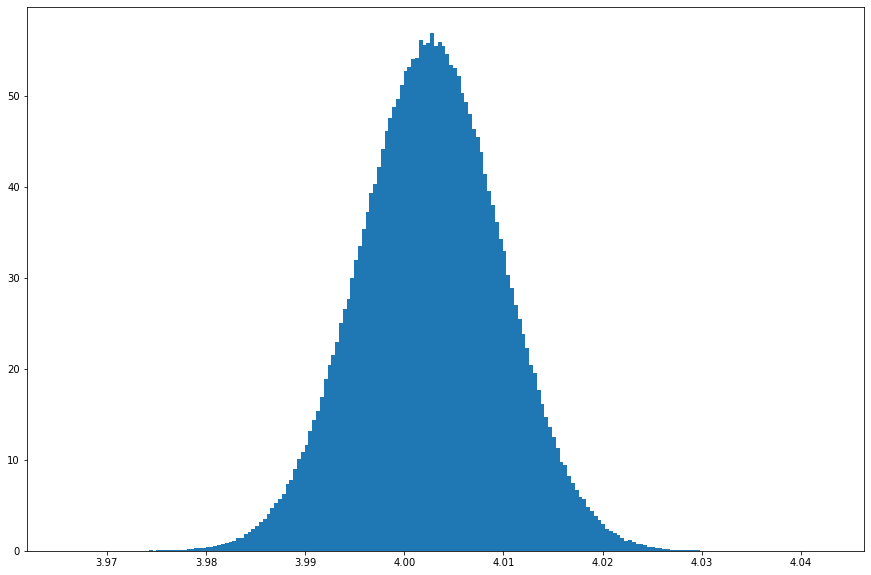

In [25]:
plt.figure(figsize=(15,10))
plt.hist(pH,bins=200,density=True)
plt.show()

In [26]:
pH.mean(),2*pH.std()

(4.002694677147583, 0.01427127702528091)